# **TECHIN 513: Managing Data and Signal Processing ICTE 2**

You task is load  RSSI database from "RSSI.csv" and plot a path map with X and Y.

*Note:*

Column's name is each WiFi router's address

Each column represents as WiFi router's RSSI （Received Signal Strength Indicator）

Each row represents as one data log that received at the X and Y position

X and Y represent the real location



      TO DO
      1.   Load CSV file "RSSI.csv"
      2.   Check and modify data (check for missing values NaN)
      3.   Count the number of times there was no signal from the router in each column except X and Y (-100 represent no signal from that WiFi router)
      4.   Find top 10 of most usable WiFi router
      5.   Plot a map with X and Y

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 1)Load CSV file "RSSI.csv"
# 2)Check and modify data (check for missing values NaN)
# 3)Count the number of times there was no signal from the router in each column except X and Y
#   (-100 represent no signal from that WiFi router)
# 4)Find top 10 of most usable WiFi router
# 5)Plot a map with X and Y

In [ ]:
pip install pandas

In [26]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Is there NaN?  False
numbers of no signals:  [155, 975, 994, 0, 10, 222, 499, 442, 787, 118, 156, 147, 200, 220, 318, 308, 335, 0, 0, 9, 217, 251, 571, 983, 389, 348, 488, 422, 458, 675, 774, 738, 219, 180, 424, 657, 646, 865, 939, 890, 527, 590, 401, 653, 475, 665, 657, 983, 353, 350, 388, 753, 705, 990, 964, 433, 453, 598, 658, 599, 885, 358, 368, 570, 689, 732, 496, 1004, 926, 918, 925, 887, 952, 838, 828, 940, 297, 281, 994, 986, 844, 838, 900, 914, 1008, 419, 546, 653, 829, 810, 966, 898, 419, 420, 646, 787, 769, 970, 397, 387, 725, 708, 815, 853, 839, 952, 683, 610, 749, 709, 696, 287, 261, 371, 409, 647, 904, 956, 1008, 737, 835, 828, 671, 756, 1002, 979, 720, 992, 680, 607, 874, 914, 549, 495, 577, 860, 860, 654, 736, 727, 948, 933, 494, 552, 628, 510, 549, 429, 473, 598, 764, 759, 865, 870, 981, 443, 445, 838, 987, 724, 1008, 1008, 690, 981, 952, 940, 900, 907, 967, 924, 910, 991, 896, 991, 841, 822, 945, 1011, 864, 888, 852, 988, 773, 799, 1009, 852, 906, 910, 996, 803, 725, 

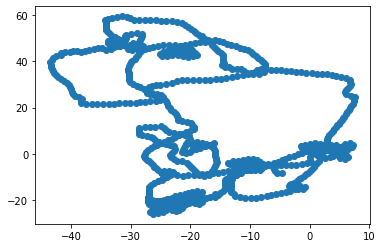

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv ('RSSI.csv')
print("Is there NaN? ", df.isnull().values.any())

routers = df.columns[2:]

no_signal_counts = [0] * len(routers)
for i, router in enumerate(routers):
  counts = df[router].value_counts()
  if -100 in list(counts.keys()):
    no_signal_counts[i] = counts[-100]
  # no_signal_counts[i]
print("numbers of no signals: ", no_signal_counts)

top_10_routers_index = sorted(range(len(no_signal_counts)), key=lambda i: no_signal_counts[i], reverse=True)[:10]

print("Top 10 Routers based on less '-100' occurance: ")
for i in top_10_routers_index:
  print(routers[i])

plt.scatter(df['X'], df['Y'])
plt.show()
